<div style="text-align: center;">
    <h1> </font> <font color = #4854E8>Model Performance Comparison</h2> </font>
</div>

> When building predictive models, it is essential to evaluate their performance in order to confirm their efficacy in real-world applications. Model comparison is an important stage in this process since it compares different algorithms' capacity to accurately predict outcomes. These metrics provide insight into the model's predictive ability, robustness, and generalization capabilities. This chapter will look at how different machine learning algorithms perform in predicting energy consumption across regions, using techniques such as Extra Trees, Gradient Boosting, XGBoost, LightGBM, CatBoost, ADABoost, and Stacked Ensemble Meta model.
These algorithms are trained using the training data, which is divided based on regions, and then evaluated using test data. This process follows the steps listed below for each algorithm.
> 
> - Training: Each algorithm is trained using both the input and output data from its corresponding region before storing the trained models in dictionaries indexed by region.
> - Prediction: After training, the models make predictions on the test which iterates over each region using the corresponding model and stores them in a dictionary.
> - Evaluation: Metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared (R²), and Adjusted R-squared are used to evaluate the predictions' accuracy and generalizability.

> The process is repeated for each algorithm and ensures predictions and evaluations are conducted separately for each region, allowing for a granular assessment of the model's performance across regions. It also handles scenarios in which the number of samples in the actual and predicted data may not match, ensuring robustness and accuracy in the evaluation process. Furthermore, a Stacked Ensemble technique is implemented to combine predictions from the XGBoost and LightGBM models using a Random Forest meta-model that could enhance prediction accuracy. 


---

In [1]:
%run ./Model_Evaluation_Comparison_utilities.ipynb

In [2]:
# Load resampled_data from the pickle file
resampled_data = load_from_pickle('resampled_data.pkl')

# 01- Splitting the data into train and test sets 

The following function, takes the above resampled_data DataFrame as input. It first initializes a RandomState instance with a specific seed (42) to ensure reproducibility in the train-test split. Then, it splits the resampled_data into train and test sets using train_test_split function from scikit-learn, with the shuffle parameter set to False to prevent shuffling of data. Then, it defines the input and output columns for the model. The input columns include various features such as weather conditions, time-related information, and encoded categorical variables. The output column is "TotalDemand", representing the target variable.

After defining the input and output columns, it selects the corresponding data from the train and test sets, including the "Region" column which is used as a categorical variable. The selected input and output data for both train and test sets are then returned from the function.

In [3]:
train_input_data, train_output_data, test_input_data, test_output_data = create_train_test_split(resampled_data)

# 02- Calling trained model algorithms

In [4]:
# Get predictions using trained ExtraTreesRegressor model
trained_models_et = ExtraTrees(train_input_data, train_output_data)

In [5]:
# Get predictions using trained GradientBoostingRegressor model
trained_models_gbr = GradientBoosting(train_input_data, train_output_data)

In [6]:
# Get predictions using trained XGBoostRegressor model
trained_models_xgb = XGBoost(train_input_data, train_output_data)

In [7]:
# Get predictions using trained LightGBMRegressor model
trained_models_lgbm = LightGBM(train_input_data, train_output_data)

In [8]:
# Get predictions using trained CatBoost Regressor model
trained_models_cbr = CatBoost(train_input_data, train_output_data)

In [9]:
# Get predictions using trained ADABoost Regressor model
trained_models_adab = ADABoost(train_input_data, train_output_data)

# 03- Calling the predictions function with both test and train data 

In [10]:
# ExtraTreesRegressor model

# Call the function with test data
test_predictions_ET, _ = get_predictions(trained_models_et, test_input_data, test_output_data)

# Call the function with both test and train data
test_predictions_ET, train_predictions_ET = get_predictions(trained_models_et, test_input_data, test_output_data, train_input_data)

In [11]:
# GradientBoostingRegressor model

# Call the function with test data
test_predictions_GBR, _ = get_predictions(trained_models_gbr, test_input_data, test_output_data)

# Call the function with both test and train data
test_predictions_GBR, train_predictions_GBR = get_predictions(trained_models_gbr, test_input_data, test_output_data, train_input_data)

In [12]:
# XGBoostRegressor model

# Call the function with test data
test_predictions_XGB, _ = get_predictions(trained_models_xgb, test_input_data, test_output_data)

# Call the function with both test and train data
test_predictions_XGB, train_predictions_XGB = get_predictions(trained_models_xgb, test_input_data, test_output_data, train_input_data)

In [13]:
# LightGBMRegressor model

# Call the function with test data
test_predictions_LGBM, _ = get_predictions(trained_models_lgbm, test_input_data, test_output_data)

# Call the function with both test and train data
test_predictions_LGBM, train_predictions_LGBM = get_predictions(trained_models_lgbm, test_input_data, test_output_data, train_input_data)

In [14]:
# CatBoost Regressor model

# Call the function with test data
test_predictions_CBR, _ = get_predictions(trained_models_cbr, test_input_data, test_output_data)

# Call the function with both test and train data
test_predictions_CBR, train_predictions_CBR = get_predictions(trained_models_cbr, test_input_data, test_output_data, train_input_data)

In [15]:
# ADABoost Regressor model

# Call the function with test data
test_predictions_ADAB, _ = get_predictions(trained_models_cbr, test_input_data, test_output_data)

# Call the function with both test and train data
test_predictions_ADAB, train_predictions_ADAB = get_predictions(trained_models_adab, test_input_data, test_output_data, train_input_data)

In [16]:
# Stacked Ensemble model

# Call the function to combine predictions from XGBoost and LightGBM models
ensemble_test_predictions = Stacked_Ensemble_Combine_Predictions(trained_models_xgb, trained_models_lgbm, test_input_data)

# 04- Calling model Performance evaluation metrics for both test and train data

In [17]:
# ExtraTreesRegressor model

# Calculate evaluation metrics
evaluation_metrics_test_ET, evaluation_metrics_train_ET = evaluate_model(test_output_data, test_predictions_ET, train_output_data, train_predictions_ET)

print("Evaluation Metrics for Train and Test Data (ExtraTress Regressor):")

for region in evaluation_metrics_test_ET.keys():
    print(f"Region: {region}")
    
    # Print evaluation metrics for train data
    print("Train Data:")
    train_metrics = evaluation_metrics_train_ET[region]
    print(f"MSE: {train_metrics['MSE']}")
    print(f"RMSE: {train_metrics['RMSE']}")
    print(f"MAE: {train_metrics['MAE']}")
    print(f"R-squared: {train_metrics['R-squared']}")
    print(f"Adjusted R-squared: {train_metrics['Adjusted R-squared']}")
    print()
    
    # Print evaluation metrics for test data
    print("Test Data:")
    test_metrics = evaluation_metrics_test_ET[region]
    print(f"MSE: {test_metrics['MSE']}")
    print(f"RMSE: {test_metrics['RMSE']}")
    print(f"MAE: {test_metrics['MAE']}")
    print(f"R-squared: {test_metrics['R-squared']}")
    print(f"Adjusted R-squared: {test_metrics['Adjusted R-squared']}")
    print("\n") 

Evaluation Metrics for Train and Test Data (ExtraTress Regressor):
Region: QLD
Train Data:
MSE: 6.48262921498218e-23
RMSE: 8.051477637665138e-12
MAE: 6.8062574032591165e-12
R-squared: 1.0
Adjusted R-squared: 1.0

Test Data:
MSE: 147256.20219619622
RMSE: 383.7397584251549
MAE: 305.38247057050864
R-squared: 0.7941747019076579
Adjusted R-squared: 0.7941652793981316


Region: SA
Train Data:
MSE: 4.148442235863782e-24
RMSE: 2.0367725046906398e-12
MAE: 1.7256068844719183e-12
R-squared: 1.0
Adjusted R-squared: 1.0

Test Data:
MSE: 62158.56778554271
RMSE: 249.3162004073195
MAE: 184.91884348180773
R-squared: 0.3920391420145466
Adjusted R-squared: 0.39201131007634915


Region: TAS
Train Data:
MSE: 3.788808401238347e-07
RMSE: 0.0006155329724099552
MAE: 4.598860146467194e-06
R-squared: 0.9999999999828473
Adjusted R-squared: 0.999999999982847

Test Data:
MSE: 6026.209896995855
RMSE: 77.62866672174562
MAE: 62.85973792423589
R-squared: 0.7220597431592298
Adjusted R-squared: 0.7220470192873729


Regio

In [18]:
# GradientBoostingRegressor model

# Calculate evaluation metrics
evaluation_metrics_test_GBR, evaluation_metrics_train_GBR = evaluate_model(test_output_data, test_predictions_GBR, train_output_data, train_predictions_GBR)

print("Evaluation Metrics for Train and Test Data (Gradient Boosting Regressor):")

for region in evaluation_metrics_test_GBR.keys():
    print(f"Region: {region}")
    
    # Print evaluation metrics for train data
    print("Train Data:")
    train_metrics = evaluation_metrics_train_GBR[region]
    print(f"MSE: {train_metrics['MSE']}")
    print(f"RMSE: {train_metrics['RMSE']}")
    print(f"MAE: {train_metrics['MAE']}")
    print(f"R-squared: {train_metrics['R-squared']}")
    print(f"Adjusted R-squared: {train_metrics['Adjusted R-squared']}")
    print()
    
    # Print evaluation metrics for test data
    print("Test Data:")
    test_metrics = evaluation_metrics_test_GBR[region]
    print(f"MSE: {test_metrics['MSE']}")
    print(f"RMSE: {test_metrics['RMSE']}")
    print(f"MAE: {test_metrics['MAE']}")
    print(f"R-squared: {test_metrics['R-squared']}")
    print(f"Adjusted R-squared: {test_metrics['Adjusted R-squared']}")
    print("\n")



Evaluation Metrics for Train and Test Data (Gradient Boosting Regressor):
Region: QLD
Train Data:
MSE: 78486.57780618953
RMSE: 280.15456056646576
MAE: 210.35040520706258
R-squared: 0.8903980603929884
Adjusted R-squared: 0.8903963880001111

Test Data:
MSE: 155918.62256497756
RMSE: 394.8653220592783
MAE: 316.3477312695927
R-squared: 0.782066924931106
Adjusted R-squared: 0.7820569481377042


Region: SA
Train Data:
MSE: 21548.377506542936
RMSE: 146.7936562203658
MAE: 112.73069024356454
R-squared: 0.7733368708734967
Adjusted R-squared: 0.7733334122686211

Test Data:
MSE: 70503.78979510223
RMSE: 265.5254974481777
MAE: 202.8629039296899
R-squared: 0.3104161491792621
Adjusted R-squared: 0.3103845806089077


Region: TAS
Train Data:
MSE: 4274.448581654797
RMSE: 65.37926721564564
MAE: 51.51633440836983
R-squared: 0.8064865514404728
Adjusted R-squared: 0.8064835986595804

Test Data:
MSE: 6282.515137439947
RMSE: 79.26231852172852
MAE: 63.78585220823752
R-squared: 0.7102384582096002
Adjusted R-squar

In [19]:
# XGBoostRegressor model

# Calculate evaluation metrics
evaluation_metrics_test_XGB, evaluation_metrics_train_XGB = evaluate_model(test_output_data, test_predictions_XGB, train_output_data, train_predictions_XGB)

print("Evaluation Metrics for Train and Test Data (XGBoost Regressor):")

for region in evaluation_metrics_test_XGB.keys():
    print(f"Region: {region}")
    
    # Print evaluation metrics for train data
    print("Train Data:")
    train_metrics = evaluation_metrics_train_XGB[region]
    print(f"MSE: {train_metrics['MSE']}")
    print(f"RMSE: {train_metrics['RMSE']}")
    print(f"MAE: {train_metrics['MAE']}")
    print(f"R-squared: {train_metrics['R-squared']}")
    print(f"Adjusted R-squared: {train_metrics['Adjusted R-squared']}")
    print()
    
    # Print evaluation metrics for test data
    print("Test Data:")
    test_metrics = evaluation_metrics_test_XGB[region]
    print(f"MSE: {test_metrics['MSE']}")
    print(f"RMSE: {test_metrics['RMSE']}")
    print(f"MAE: {test_metrics['MAE']}")
    print(f"R-squared: {test_metrics['R-squared']}")
    print(f"Adjusted R-squared: {test_metrics['Adjusted R-squared']}")
    print("\n")

Evaluation Metrics for Train and Test Data (XGBoost Regressor):
Region: QLD
Train Data:
MSE: 30012.85134697535
RMSE: 173.24217542785402
MAE: 127.92570231478471
R-squared: 0.9580887992226106
Adjusted R-squared: 0.9580881597084385

Test Data:
MSE: 126284.14661097532
RMSE: 355.3648077834598
MAE: 279.49348919174275
R-squared: 0.823488099428844
Adjusted R-squared: 0.8234800188620719


Region: SA
Train Data:
MSE: 8385.858212217026
RMSE: 91.57433162309745
MAE: 69.21661921765747
R-squared: 0.9117908129178103
Adjusted R-squared: 0.9117894669524312

Test Data:
MSE: 71074.85835577403
RMSE: 266.59868408485073
MAE: 199.64370629443985
R-squared: 0.3048306386940077
Adjusted R-squared: 0.30479881442366774


Region: TAS
Train Data:
MSE: 1750.0322889769177
RMSE: 41.8333872520134
MAE: 32.51789712186058
R-squared: 0.9207722874983466
Adjusted R-squared: 0.9207710785793937

Test Data:
MSE: 6116.842322512992
RMSE: 78.21024435783967
MAE: 63.2116754354344
R-squared: 0.7178796033936214
Adjusted R-squared: 0.717

In [20]:
# LightGBMRegressor model

# Calculate evaluation metrics
evaluation_metrics_test_LGBM, evaluation_metrics_train_LGBM = evaluate_model(test_output_data, test_predictions_LGBM, train_output_data, train_predictions_LGBM)

print("Evaluation Metrics for Train and Test Data (LightGBM Regressor):")

for region in evaluation_metrics_test_LGBM.keys():
    print(f"Region: {region}")
    
    # Print evaluation metrics for train data
    print("Train Data:")
    train_metrics = evaluation_metrics_train_LGBM[region]
    print(f"MSE: {train_metrics['MSE']}")
    print(f"RMSE: {train_metrics['RMSE']}")
    print(f"MAE: {train_metrics['MAE']}")
    print(f"R-squared: {train_metrics['R-squared']}")
    print(f"Adjusted R-squared: {train_metrics['Adjusted R-squared']}")
    print()
    
    # Print evaluation metrics for test data
    print("Test Data:")
    test_metrics = evaluation_metrics_test_LGBM[region]
    print(f"MSE: {test_metrics['MSE']}")
    print(f"RMSE: {test_metrics['RMSE']}")
    print(f"MAE: {test_metrics['MAE']}")
    print(f"R-squared: {test_metrics['R-squared']}")
    print(f"Adjusted R-squared: {test_metrics['Adjusted R-squared']}")
    print("\n")

Evaluation Metrics for Train and Test Data (LightGBM Regressor):
Region: QLD
Train Data:
MSE: 48361.027822176104
RMSE: 219.91140903140086
MAE: 163.17131526791943
R-squared: 0.9324666382602663
Adjusted R-squared: 0.9324656077829448

Test Data:
MSE: 123853.42352190726
RMSE: 351.92815107903385
MAE: 277.32241807600485
R-squared: 0.8268856086469671
Adjusted R-squared: 0.8268776836153175


Region: SA
Train Data:
MSE: 13607.842899077268
RMSE: 116.65265920276858
MAE: 89.45609247402163
R-squared: 0.8568617868686319
Adjusted R-squared: 0.8568596027528309

Test Data:
MSE: 62861.60408205886
RMSE: 250.72216511919893
MAE: 188.65032147631672
R-squared: 0.3851628807805436
Adjusted R-squared: 0.3851347340528738


Region: TAS
Train Data:
MSE: 2808.7452602503777
RMSE: 52.99759674032755
MAE: 41.95734662801454
R-squared: 0.8728420821883283
Adjusted R-squared: 0.8728401419124827

Test Data:
MSE: 5611.715057575267
RMSE: 74.91138136208187
MAE: 60.63065687346351
R-squared: 0.7411770331469488
Adjusted R-squared

In [21]:
# CatBoost Regressor model

# Calculate evaluation metrics
evaluation_metrics_test_CBR, evaluation_metrics_train_CBR = evaluate_model(test_output_data, test_predictions_CBR, train_output_data, train_predictions_CBR)

print("Evaluation Metrics for Train and Test Data (CatBoost Regressor):")

for region in evaluation_metrics_test_CBR.keys():
    print(f"Region: {region}")
    
    # Print evaluation metrics for train data
    print("Train Data:")
    train_metrics = evaluation_metrics_train_CBR[region]
    print(f"MSE: {train_metrics['MSE']}")
    print(f"RMSE: {train_metrics['RMSE']}")
    print(f"MAE: {train_metrics['MAE']}")
    print(f"R-squared: {train_metrics['R-squared']}")
    print(f"Adjusted R-squared: {train_metrics['Adjusted R-squared']}")
    print()
    
    # Print evaluation metrics for test data
    print("Test Data:")
    test_metrics = evaluation_metrics_test_CBR[region]
    print(f"MSE: {test_metrics['MSE']}")
    print(f"RMSE: {test_metrics['RMSE']}")
    print(f"MAE: {test_metrics['MAE']}")
    print(f"R-squared: {test_metrics['R-squared']}")
    print(f"Adjusted R-squared: {test_metrics['Adjusted R-squared']}")
    print("\n")

Evaluation Metrics for Train and Test Data (CatBoost Regressor):
Region: QLD
Train Data:
MSE: 33082.05936100814
RMSE: 181.88474196866582
MAE: 133.5478560331497
R-squared: 0.95380282879559
Adjusted R-squared: 0.9538021238826992

Test Data:
MSE: 114139.24942740322
RMSE: 337.84500799538716
MAE: 267.40603519880835
R-squared: 0.8404634596909475
Adjusted R-squared: 0.8404561562419313


Region: SA
Train Data:
MSE: 9447.686439412582
RMSE: 97.19921007607306
MAE: 73.83553366567713
R-squared: 0.9006216514114317
Adjusted R-squared: 0.9006201350181732

Test Data:
MSE: 64199.565081999
RMSE: 253.37633094272834
MAE: 189.44733150676154
R-squared: 0.3720765445528309
Adjusted R-squared: 0.3720477987436638


Region: TAS
Train Data:
MSE: 1917.1363207070408
RMSE: 43.78511528712744
MAE: 34.30561580493178
R-squared: 0.9132071298340151
Adjusted R-squared: 0.913205805479917

Test Data:
MSE: 5767.3417883152415
RMSE: 75.94301671855841
MAE: 61.67511172436887
R-squared: 0.7339992324641812
Adjusted R-squared: 0.7339

In [22]:
# ADABoost Regressor model

# Calculate evaluation metrics
evaluation_metrics_test_ADAB, evaluation_metrics_train_ADAB = evaluate_model(test_output_data, test_predictions_ADAB, train_output_data, train_predictions_ADAB)

print("Evaluation Metrics for Train and Test Data (ADABoost Regressor):")

for region in evaluation_metrics_test_ADAB.keys():
    print(f"Region: {region}")
    
    # Print evaluation metrics for train data
    print("Train Data:")
    train_metrics = evaluation_metrics_train_ADAB[region]
    print(f"MSE: {train_metrics['MSE']}")
    print(f"RMSE: {train_metrics['RMSE']}")
    print(f"MAE: {train_metrics['MAE']}")
    print(f"R-squared: {train_metrics['R-squared']}")
    print(f"Adjusted R-squared: {train_metrics['Adjusted R-squared']}")
    print()
    
    # Print evaluation metrics for test data
    print("Test Data:")
    test_metrics = evaluation_metrics_test_ADAB[region]
    print(f"MSE: {test_metrics['MSE']}")
    print(f"RMSE: {test_metrics['RMSE']}")
    print(f"MAE: {test_metrics['MAE']}")
    print(f"R-squared: {test_metrics['R-squared']}")
    print(f"Adjusted R-squared: {test_metrics['Adjusted R-squared']}")
    print("\n")

Evaluation Metrics for Train and Test Data (ADABoost Regressor):
Region: QLD
Train Data:
MSE: 167931.47997494048
RMSE: 409.7944362420511
MAE: 334.13045339587677
R-squared: 0.7654934583620232
Adjusted R-squared: 0.7654898800761706

Test Data:
MSE: 221059.2671589309
RMSE: 470.1694026188124
MAE: 367.7103334403829
R-squared: 0.6910174995655503
Adjusted R-squared: 0.6910033546058161


Region: SA
Train Data:
MSE: 42716.36638070117
RMSE: 206.67938063750134
MAE: 168.7981609416638
R-squared: 0.5506749746785349
Adjusted R-squared: 0.550668118522753

Test Data:
MSE: 77257.65699902063
RMSE: 277.95261646370705
MAE: 227.04410396590245
R-squared: 0.24435788808514025
Adjusted R-squared: 0.24432329542299447


Region: TAS
Train Data:
MSE: 5916.485929427418
RMSE: 76.91869687811553
MAE: 61.02088366098758
R-squared: 0.7321480013887127
Adjusted R-squared: 0.732143914291566

Test Data:
MSE: 7388.373680944079
RMSE: 85.95564949986753
MAE: 68.98044691062837
R-squared: 0.6592341598421765
Adjusted R-squared: 0.65

In [23]:
# Stacked Ensemble model

# Dictionary to store evaluation metrics for each region
region_wise_metrics = {}

# Iterate over each region
for region in trained_models_xgb.keys():
    
    # Retrieve the true target values for the current region
    true_values_region = test_output_data[test_output_data["Region"] == region].drop(columns=["Region"]).values.ravel()
    
    # Retrieve the predicted target values for the current region
    predicted_values_region = ensemble_test_predictions[region]
    
    # Calculate evaluation metrics for the current region
    mae_region = mean_absolute_error(true_values_region, predicted_values_region)
    mse_region = mean_squared_error(true_values_region, predicted_values_region)
    rmse_region = np.sqrt(mse_region)  # Calculate RMSE
    r2_region = r2_score(true_values_region, predicted_values_region)
    
    # Calculate Adjusted R-squared
    n = len(true_values_region)
    p = 2  # Number of predictors (XGBoost and LightGBM)
    adjusted_r2_region = 1 - (1 - r2_region) * ((n - 1) / (n - p - 1))
    
    # Store the evaluation metrics for the current region
    region_wise_metrics[region] = {'MAE': mae_region, 'MSE': mse_region, 'RMSE': rmse_region,
                                   'R2': r2_region, 'Adjusted R2': adjusted_r2_region}

# Print region-wise evaluation metrics
print("Evaluation Metrics for Test Data (Stacked Ensemble model):")

for region, metrics in region_wise_metrics.items():
    print(f"Region: {region}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']}")
    print(f"R-squared (R2): {metrics['R2']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R2']}")
    print()

Evaluation Metrics for Test Data (Stacked Ensemble model):
Region: NSW
Mean Absolute Error (MAE): 381.84169061247445
Mean Squared Error (MSE): 271441.31024924945
Root Mean Squared Error (RMSE): 521.0002977439163
R-squared (R2): 0.8128799065226373
Adjusted R-squared: 0.8128627733364012

Region: QLD
Mean Absolute Error (MAE): 279.4943478979991
Mean Squared Error (MSE): 126285.1138254716
Root Mean Squared Error (RMSE): 355.36616865631936
R-squared (R2): 0.8234867475183028
Adjusted R-squared: 0.8234705855210971

Region: SA
Mean Absolute Error (MAE): 199.64210225781724
Mean Squared Error (MSE): 71072.70445702573
Root Mean Squared Error (RMSE): 266.594644464261
R-squared (R2): 0.30485170555860397
Adjusted R-squared: 0.3047880560329489

Region: TAS
Mean Absolute Error (MAE): 63.21141076583604
Mean Squared Error (MSE): 6116.784844121585
Root Mean Squared Error (RMSE): 78.20987689621806
R-squared (R2): 0.717882254406305
Adjusted R-squared: 0.7178564229961879

Region: VIC
Mean Absolute Error (MA

### Model Evaluation Metrics

The following evaluation metrics show how well the model performs on unseen data. Each metric provides a new perspective on the model's predictive skills, providing a deeper understanding of its strengths and weaknesses.

Mean Squared Error (MSE): calculates the average squared differences between predicted and actual values for each data point.

Root Mean Squared Error (RMSE): calculates as the square root of the average squared differences between predicted and actual values. 

Mean Absolute Error (MAE): the average absolute difference between predicted and actual values, independent of error direction. 

R-squared (R²): measures the proportion of variance explained by the model's predictions. It evaluates the model's likelihood of fit by comparing the variance of the predicted values to the variance of the actual values.

Adjusted R-squared: modified form of R-squared that incorporates the number of predictors in the model.


Metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) evaluate the accuracy of a regression model's predictions. They calculate the average deviation (or percentage deviation) between the predicted and actual values of the target variable. However, while these metrics are vital for determining the accuracy of predictions, they have limitations when used alone. For example, MSE penalizes large errors more harshly than small errors, which may not always be consistent with the objectives of the modelling function. RMSE penalizes large errors more harshly than smaller errors, and MAE offers no information regarding the direction of errors.

Adjusted R-squared provides a more comprehensive and holistic assessment of how well the model fits the data. Unlike R-squared, which tends to increase when more features are added to the model (even if they are not genuinely influential), adjusted R-squared penalizes the addition of irrelevant features. It incorporates the number of predictors in the model, giving a more realistic evaluation of the model's explanatory power while taking into account its complexity. This adjustment is essential because adding more predictors to the model may artificially increase the R-squared value, even if those predictors do not actually assist in explaining the variance in the target variable. As a result, features with a strong correlation with the target variable and a higher R-squared value are more likely to be important. Furthermore, features with a greater impact on the target variable (as shown by a higher R-squared value) tend to be more interpretable and easier to justify in real-world situations. Prioritizing these features can result in more useful insights and decisions based on the model's predictions.

However, Queensland and New South Wales had greater R-squared values, as well as higher MSE, RMSE, and MAE in almost all algorithms in the model evaluation comparison chapter above. This apparent contradiction could be attributable to the fact that the data in Queensland and New South Wales might be more varied, resulting in larger errors despite a relatively better fit overall. Furthermore, the model might be overfitting the data from Queensland and New South Wales, capturing noise rather than actual underlying patterns. This could result in better R-squared values but also larger errors when predicting new data.


# 05- Analyzing and interpreting the results of the model evaluation metrics

The grouped bar plot below displays the comparison of adjusted R-squared values for several predictive models across five regions: New South Wales (NSW), Victoria (VIC), Queensland (QLD), South Australia (SA), and Tasmania (TAS). The models included are ExtraTrees, Gradient Boosting, XGBoost, LightGBM, CatBoost, ADABoost, and Stacked Ensemble Meta model.

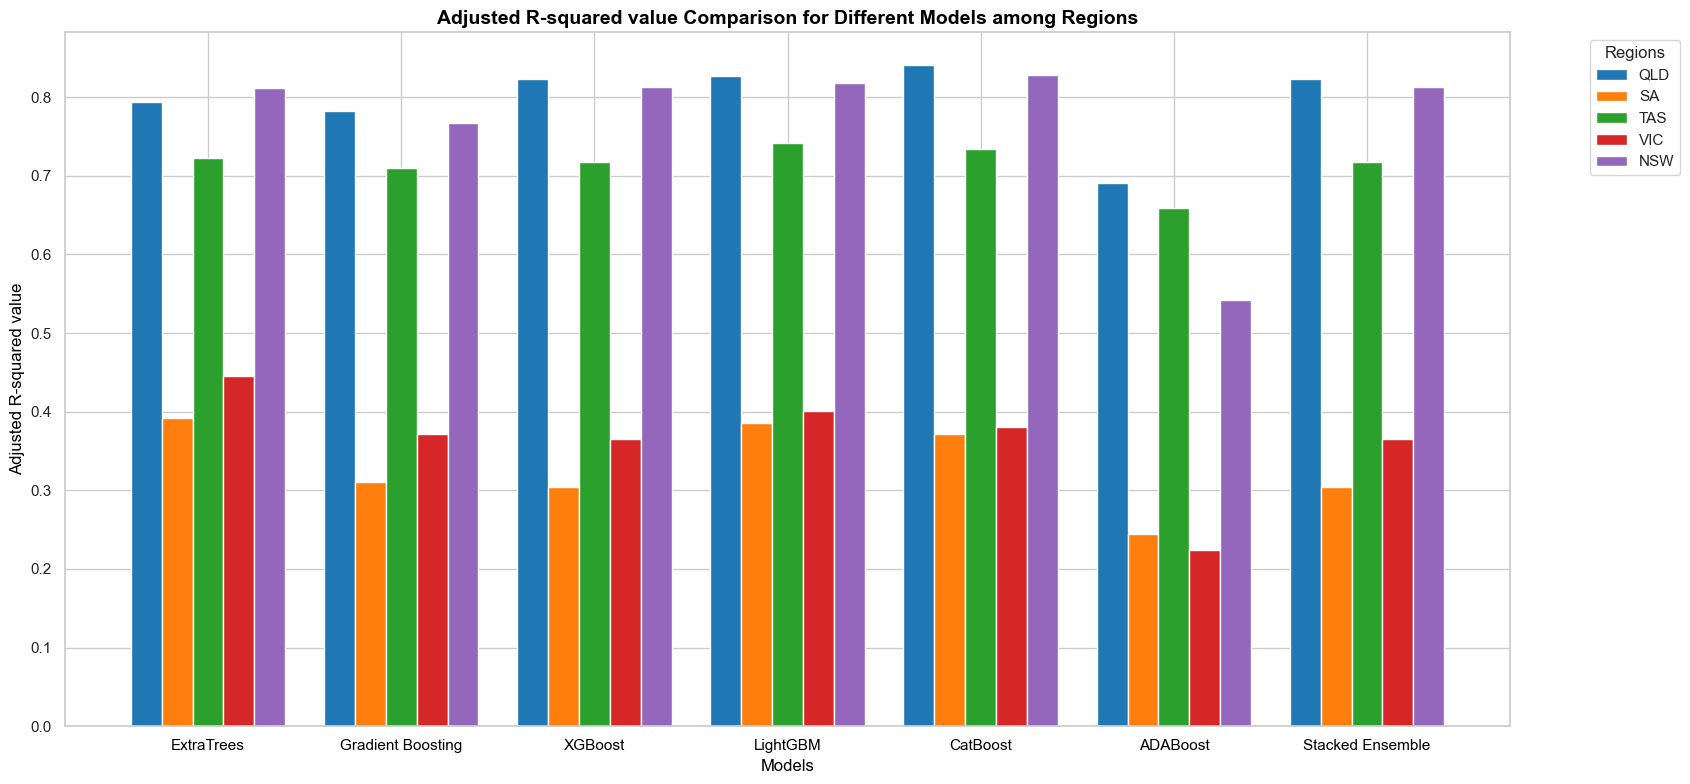

In [24]:
adjusted_r_model_comparison();

The graph above analyses how different models in each region contribute to explaining the variance in the target variable. It indicates that Queensland and New South Wales consistently have the highest adjusted R-squared values across all models, implying that the models are better fit for the data in these regions than in others. Tasmania generally has adjusted R-squared values that are neither the highest nor the lowest among all models, suggesting a moderate performance. South Australia and Victoria consistently have the lowest adjusted R-squared values across all models, indicating that the models provide a poorer fit to the data in these regions than in other regions.

It can be observed that the above algorithms generally perform well across different regions, with relatively low error metrics and moderate to high R-squared values. However, performance varies among regions, indicating potential variances in fundamental data patterns or predicting issues specific to the particular locations. Among these models, the top three performers based on the overall evaluation metrics are:


1. LightGBM Regressor
2. 
CatBoost Regresso
3. 
XGBoost Regressor


These models consistently show greater predictive accuracy and goodness of fit across many locations, exhibiting their ability to capture the complexity of the data and generate accurate predictions.

---